# Daily Metrics Analysis

This notebook analyzes daily metrics data to uncover patterns and insights in daily activity. The data is collected from Garmin smartwatches and includes information such as steps, floors, intensity minutes, and heart rate.

<div></div>

## 1. Setup and Data Loading

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt

In [3]:
sns.set_palette('husl')

# Load data
first_df = pd.read_json('../../data/raw/daily_metrics_2024-05-01_2024-08-09.json')
second_df = pd.read_json('../../data/raw/daily_metrics_2024-08-09_2024-11-17.json')

df = pd.concat([first_df, second_df])

# Display first few rows
display(df.head())

,userProfilePK,calendarDate,uuid,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,consumedKilocalories,remainingKilocalories,...,bodyBattery,minAvgHeartRate,maxAvgHeartRate,version,averageMonitoringEnvironmentAltitude,hydration,respiration,dailyTotalFromEpochData,bodyBatteryFeedback,burnedKilocalories
0,124522471,2024-07-30,5013d407437445bfb986f880c1e12825,86400000,2619.0,516.0,2103.0,2619.0,1722.0,897,...,"{'userProfilePK': 124522471, 'calendarDate': '...",53.0,184.0,80040002,22.0,"{'userProfilePK': 124522471, 'calendarDate': '...","{'userProfilePK': 124522471, 'calendarDate': '...",1.0,NaN,NaN
1,124522471,2024-07-31,901d734a3c4a4026972d30e41453176a,86400000,3026.0,923.0,2103.0,3026.0,1101.0,1925,...,"{'userProfilePK': 124522471, 'calendarDate': '...",46.0,178.0,75060002,25.0,"{'userProfilePK': 124522471, 'calendarDate': '...","{'userProfilePK': 124522471, 'calendarDate': '...",NaN,"{'userProfilePk': 124522471, 'calendarDate': {...",NaN
2,124522471,2024-08-01,706ca3caaf414c0d9119773ad06e46f5,86400000,2492.0,389.0,2103.0,2492.0,NaN,2492,...,"{'userProfilePK': 124522471, 'calendarDate': '...",48.0,172.0,85920002,33.0,"{'userProfilePK': 124522471, 'calendarDate': '...","{'userProfilePK': 124522471, 'calendarDate': '...",NaN,"{'userProfilePk': 124522471, 'calendarDate': {...",NaN
3,124522471,2024-08-02,3a554c0468474d54b86785f1097df9b2,86400000,2822.0,719.0,2103.0,2822.0,NaN,2822,...,"{'userProfilePK': 124522471, 'calendarDate': '...",45.0,178.0,86280002,25.0,"{'userProfilePK': 124522471, 'calendarDate': '...","{'userProfilePK': 124522471, 'calendarDate': '...",NaN,"{'userProfilePk': 124522471, 'calendarDate': {...",NaN
4,124522471,2024-08-03,69ef647f89524e0da5fe9dae46b34168,86400000,2348.0,245.0,2103.0,2348.0,NaN,2348,...,"{'userProfilePK': 124522471, 'calendarDate': '...",49.0,122.0,80340002,32.0,NaN,"{'userProfilePK': 124522471, 'calendarDate': '...",NaN,"{'userProfilePk': 124522471, 'calendarDate': {...",NaN


<div>

</div>

## 2. Data Cleaning & Preprocessing

Clean and preprocess data by:

- Converting dates to datetime format
- Parsing JSON body battery, respiration, and body battery feedback
- Dropping columns with irrelevant data (`UserProfilePK`)

In [4]:
# Convert the calendarDate column to datetime
df['calendarDate'] = pd.to_datetime(df['calendarDate'])

# Helper function to convert json quotes to double quotes
def clean_json_string(s):
    """Convert string JSON to proper format and handle NaN values."""
    if pd.isna(s):
        return None
    return json.loads(str(s).replace("'", '"'))

<div></div>

## 3. Exploratory Data Analysis (EDA)

Explore dataset's basic characteristics and identify any data quality issues.

In [5]:
# Basic dataset information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

# Date range analysis
date_range = pd.date_range(start=df['calendarDate'].min(), end=df['calendarDate'].max())
missing_dates = set(date_range) - set(df['calendarDate'])

print(f"\nDate Range: {df['calendarDate'].min()} to {df['calendarDate'].max()}")
print(f"Total Days: {(df['calendarDate'].max() - df['calendarDate'].min()).days}")

if missing_dates:
    print("\nMissing dates in dataset:")
    print(sorted(missing_dates))

Dataset Shape: (110, 55)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 99
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   userProfilePK                         110 non-null    int64         
 1   calendarDate                          110 non-null    datetime64[ns]
 2   uuid                                  110 non-null    object        
 3   durationInMilliseconds                110 non-null    int64         
 4   totalKilocalories                     92 non-null     float64       
 5   activeKilocalories                    92 non-null     float64       
 6   bmrKilocalories                       92 non-null     float64       
 7   wellnessKilocalories                  92 non-null     float64       
 8   consumedKilocalories                  52 non-null     float64       
 9   remainingKilocalories                 110 

,userProfilePK,calendarDate,durationInMilliseconds,totalKilocalories,activeKilocalories,bmrKilocalories,wellnessKilocalories,consumedKilocalories,remainingKilocalories,wellnessTotalKilocalories,...,restingHeartRate,currentDayRestingHeartRate,restingHeartRateTimestamp,source,minAvgHeartRate,maxAvgHeartRate,version,averageMonitoringEnvironmentAltitude,dailyTotalFromEpochData,burnedKilocalories
count,110.0,110,1.100000e+02,92.000000,92.000000,92.000000,92.000000,52.000000,110.000000,92.000000,...,92.000000,92.000000,9.200000e+01,92.0,92.000000,92.000000,1.100000e+02,92.000000,5.0,1.0
mean,124522471.0,2024-09-22 12:00:00,7.167818e+07,2556.684783,460.500000,2096.184783,2550.445652,2605.596154,906.581818,2550.445652,...,51.597826,51.619565,1.727016e+12,0.0,49.804348,138.782609,3.533237e+07,56.228261,1.0,574.0
min,124522471.0,2024-07-30 00:00:00,0.000000e+00,887.000000,19.000000,787.000000,887.000000,835.000000,-3271.000000,887.000000,...,48.000000,45.000000,1.722409e+12,0.0,41.000000,99.000000,1.000000e+00,4.000000,1.0,574.0
25%,124522471.0,2024-08-26 06:00:00,8.640000e+07,2310.250000,198.000000,2113.000000,2310.250000,2669.500000,-408.250000,2310.250000,...,50.000000,49.000000,1.724375e+12,0.0,47.000000,118.750000,2.000000e+00,25.750000,1.0,574.0
50%,124522471.0,2024-09-22 12:00:00,8.640000e+07,2426.000000,313.000000,2113.000000,2426.000000,2758.500000,2151.500000,2426.000000,...,52.000000,52.000000,1.726340e+12,0.0,49.500000,126.500000,1.250000e+01,33.000000,1.0,574.0
75%,124522471.0,2024-10-19 18:00:00,8.640000e+07,2768.750000,637.250000,2113.000000,2768.750000,2808.500000,2447.000000,2768.750000,...,53.250000,54.000000,1.729861e+12,0.0,52.000000,168.500000,7.939500e+07,47.250000,1.0,574.0
max,124522471.0,2024-11-16 00:00:00,8.640000e+07,4797.000000,2694.000000,2136.000000,4797.000000,3271.000000,4797.000000,4797.000000,...,56.000000,60.000000,1.731823e+12,0.0,60.000000,184.000000,8.634000e+07,670.000000,1.0,574.0
std,0.0,NaN,3.227251e+07,453.086289,416.241226,139.702897,443.867799,568.149499,2045.074272,443.867799,...,2.301742,3.271060,2.999857e+09,0.0,3.540159,27.354742,3.826368e+07,102.294028,0.0,NaN



Missing Values:


userProfilePK                             0
calendarDate                              0
uuid                                      0
durationInMilliseconds                    0
totalKilocalories                        18
activeKilocalories                       18
bmrKilocalories                          18
wellnessKilocalories                     18
consumedKilocalories                     58
remainingKilocalories                     0
wellnessTotalKilocalories                18
wellnessActiveKilocalories               18
restingCaloriesFromActivity              77
totalSteps                               18
dailyStepGoal                            18
netCalorieGoal                           18
totalDistanceMeters                      18
wellnessDistanceMeters                   18
wellnessStartTimeGmt                     18
wellnessEndTimeGmt                       18
wellnessStartTimeLocal                   18
wellnessEndTimeLocal                     18
highlyActiveSeconds             


Date Range: 2024-07-30 00:00:00 to 2024-11-16 00:00:00
Total Days: 109


<div></div>

## 4. Daily Metrics Analysis

Analysis of key daily metrics.

<div></div>

## 5. Time-Based Analysis

Analysis of time-based patterns in daily metrics.

<div></div>

## 6. Correlation Analysis

Analyze relationships between different sleep metrics and scores.

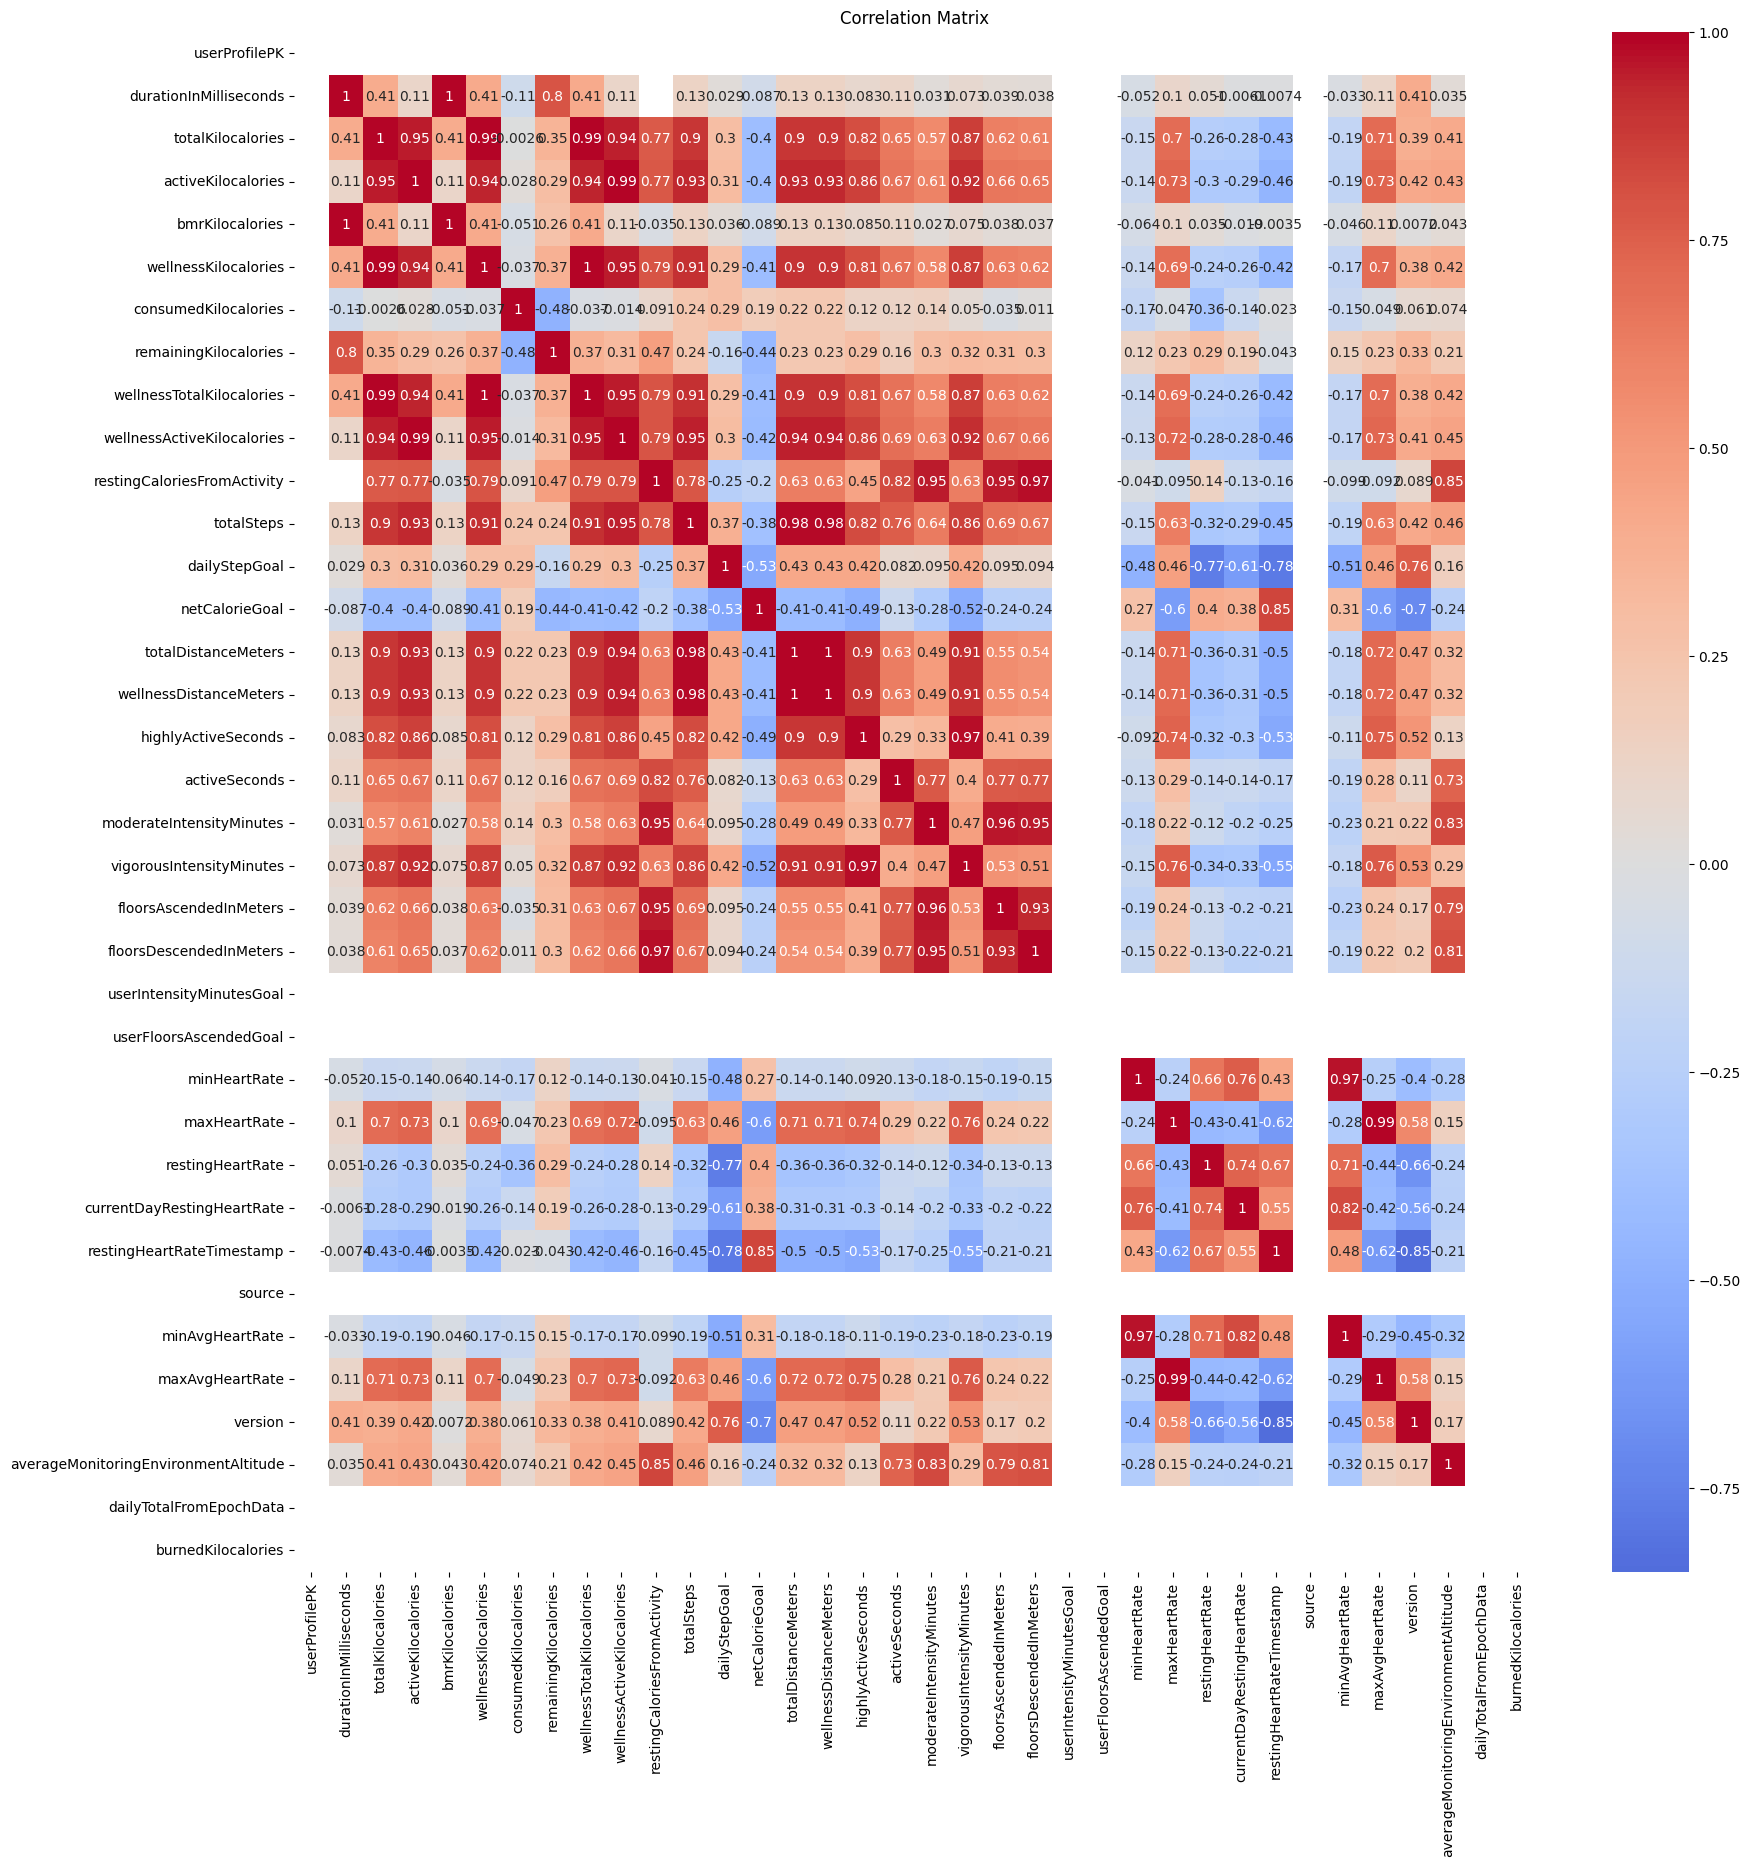

In [6]:
# Overall correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

<div></div>

## 6. Save the cleaned dataset

Export the cleaned dataset to a new CSV file for additional preprocessing and modeling.

In [ ]:
df.to_csv('../../data/interim/daily_metrics_data_eda_v1_with_time_features.csv', index=False)